In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
np.random.seed(1337)

In [4]:
path = Path('data')

In [5]:
classes = ['modern', 'classic']

In [15]:
for c in classes:
    verify_images(path/c, delete=True, max_workers=8)

In [8]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [9]:
learner = cnn_learner(data, models.resnet34, metrics=error_rate)

In [28]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.021988,0.687686,0.411765,00:23
1,0.781460,0.814957,0.441176,00:23
2,0.659993,0.708515,0.411765,00:23
3,0.579406,0.447096,0.264706,00:23


In [29]:
learner.save('stage-1')

In [30]:
learner.unfreeze()

In [31]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


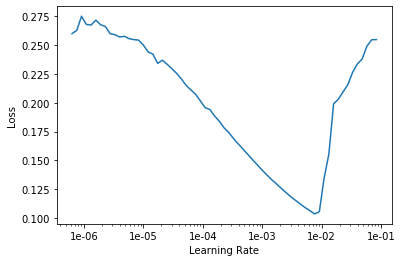

In [32]:
learner.recorder.plot()

In [33]:
learner.save('stage-2')

In [34]:
learner.fit_one_cycle(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.187316,0.166908,0.058824,00:33
1,0.193492,0.080846,0.000000,00:32


In [35]:
learner.save('stage-3')

In [37]:
interpretation = ClassificationInterpretation.from_learner(learner)

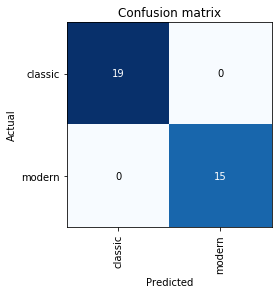

In [38]:
interpretation.plot_confusion_matrix()

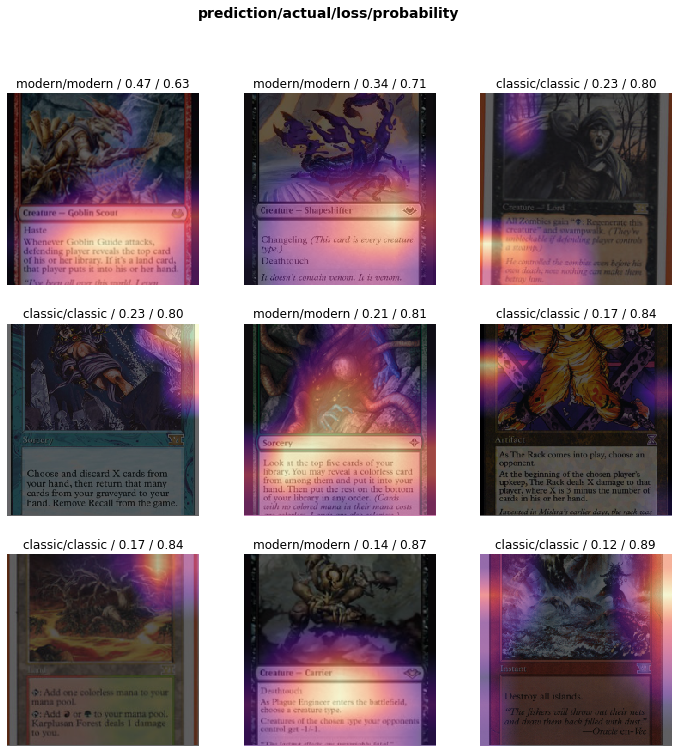

In [53]:
interpretation.plot_top_losses(9)

In [6]:
help(cnn_learner)

Help on function cnn_learner in module fastai.vision.learner:

cnn_learner(data: fastai.basic_data.DataBunch, base_arch: Callable, cut: Union[int, Callable] = None, pretrained: bool = True, lin_ftrs: Union[Collection[int], NoneType] = None, ps: Union[float, Collection[float]] = 0.5, custom_head: Union[torch.nn.modules.module.Module, NoneType] = None, split_on: Union[Callable, Collection[Collection[torch.nn.modules.module.Module]], NoneType] = None, bn_final: bool = False, init=<function kaiming_normal_ at 0x1a1d0b5950>, concat_pool: bool = True, **kwargs: Any) -> fastai.basic_train.Learner
    Build convnet style learner.



In [10]:
learner.load('stage-3')

Learner(data=ImageDataBunch;

Train: LabelList (138 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
classic,classic,classic,classic,classic
Path: data;

Valid: LabelList (34 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
classic,modern,modern,modern,classic
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [11]:
learner.export()